# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [2]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('ch.csv',low_memory=False)

In [3]:
ch_df.describe()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGED,chweight,melevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
count,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,...,16605.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,7932.000000,7932.000000,11679.000000,11679.000000
mean,428.431964,10.352275,7.726198,428.431964,10.352275,7.726198,4.172134,46.795008,15.810747,4.124199,...,1006.465522,0.916998,1.843329,2.785785,-0.146187,2.204219,-0.147429,1.800933,0.004140,2.456375
std,269.415361,5.741518,4.224276,269.415361,5.741518,4.224276,3.794440,29.048289,8.558811,1.372228,...,1108.143834,0.847431,1.406195,1.308579,0.896322,1.371325,0.930452,1.501089,0.912139,1.595279
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,-1.777233,0.000000,-3.030231,0.000000,-1.493800,0.000000
25%,192.000000,5.000000,5.000000,192.000000,5.000000,5.000000,2.000000,20.000000,8.000000,3.000000,...,436.000000,0.414079,1.000000,2.000000,-0.931318,1.000000,-0.547089,1.000000,-0.684929,1.000000
50%,399.000000,10.000000,7.000000,399.000000,10.000000,7.000000,2.000000,44.000000,16.000000,4.000000,...,922.000000,0.688373,1.000000,3.000000,-0.168406,2.000000,0.000000,1.000000,-0.029224,2.000000
75%,653.000000,15.000000,9.000000,653.000000,15.000000,9.000000,5.000000,73.000000,23.000000,5.000000,...,1373.000000,1.125123,2.000000,4.000000,0.543420,3.000000,0.495220,3.000000,0.439809,4.000000
max,975.000000,20.000000,42.000000,975.000000,20.000000,42.000000,41.000000,99.000000,31.000000,8.000000,...,9999.000000,8.381366,9.000000,5.000000,2.438155,5.000000,1.781103,5.000000,4.279130,5.000000


In [4]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGED,chweight,melevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,2,7,1,2,7,2,16,21,4,...,1133.0,0.613236,1,1,-1.537632,1,-2.735402,1.0,NaN,NaN
1,1,3,9,1,3,9,2,16,21,4,...,1464.0,0.613236,1,1,-0.643725,2,-1.635452,1.0,NaN,NaN
2,1,4,4,1,4,4,2,17,21,4,...,1376.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN
3,1,4,5,1,4,5,2,17,21,4,...,310.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN
4,1,4,6,1,4,6,2,17,21,4,...,310.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN


In [5]:
wm_df = pd.read_csv('wm.csv', low_memory = False)

In [6]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CDEAD,wmweight,welevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,7,1,1,7,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
1,1,1,8,1,1,8,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
2,1,1,9,1,1,9,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
3,1,2,2,1,2,2,16,21,4,2014,...,0.0,0.558521,1.0,1,-1.537632,1,-2.735402,1.0,NaN,NaN
4,1,3,2,1,3,2,16,21,4,2014,...,4.0,0.558521,1.0,1,-0.643725,2,-1.635452,1.0,NaN,NaN


In [7]:
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [8]:
ch_wm_df = ch_wm_df[ch_wm_df.columns.drop(list(ch_wm_df.filter(regex='_y')))]

In [9]:
ch_wm_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,WDOM,WAGEM,WDOBFC,WDOBLC,MSTATUS,CEB,CSURV,CDEAD,wmweight,welevel
0,1,2,7,1,2,7,2,16,21,4,...,1233.0,18.0,1286.0,1335.0,1.0,3.0,3.0,0.0,0.558521,1.0
1,1,3,9,1,3,9,2,16,21,4,...,1017.0,14.0,1083.0,1324.0,1.0,11.0,7.0,4.0,0.558521,1.0
2,1,3,9,1,3,9,2,16,21,4,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,0.558521,3.0
3,1,4,4,1,4,4,2,17,21,4,...,1202.0,14.0,1298.0,1362.0,1.0,5.0,5.0,0.0,0.558521,1.0
4,1,4,5,1,4,5,2,17,21,4,...,1202.0,14.0,1298.0,1362.0,1.0,5.0,5.0,0.0,0.558521,1.0


In [10]:
hh_df = pd.read_csv('hh.csv', low_memory = False)

In [11]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,HH8A,...,division,helevel,wscore,windex5,wscoreu,windex5u,wscorer,windex5r,PSU,stratum
0,1,1,17,15,21,4,2014,1,1,2,...,1,2.0,0.330435,3,-0.436749,1.0,NaN,NaN,1,1
1,1,2,16,15,21,4,2014,1,1,2,...,1,1.0,-1.537632,1,-2.735402,1.0,NaN,NaN,1,1
2,1,3,16,15,21,4,2014,1,1,1,...,1,2.0,-0.643725,2,-1.635452,1.0,NaN,NaN,1,1
3,1,4,17,15,21,4,2014,1,1,2,...,1,1.0,-0.992865,1,-2.065068,1.0,NaN,NaN,1,1
4,1,5,17,15,21,4,2014,1,1,2,...,1,1.0,-1.004787,1,-2.079738,1.0,NaN,NaN,1,1


In [12]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [13]:
df = df[df.columns.drop(list(df.filter(regex='_y')))]

In [14]:
df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,SS7,HHSEX,hhweight,ehweight,esweight,ceweight,saweight,helevel,PSU,stratum
0,1,2,7,1,2,7,2,16,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1
1,1,3,9,1,3,9,2,16,21,4,...,1.0,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,2.0,1,1
2,1,3,9,1,3,9,2,16,21,4,...,1.0,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,2.0,1,1
3,1,4,4,1,4,4,2,17,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1
4,1,4,5,1,4,5,2,17,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1


Remove ID columns

In [15]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [16]:
df['IM1'].unique()

array([nan,  3.,  1.,  2.,  9.])

In [17]:
df['AG2'].unique()

array([ 3.,  4.,  0.,  2., nan,  1.])

In [18]:
#The vaccination module is usually applied for children up to 3 years old. 
#You should subset the dataset to that target group before running the models. 
#If you don’t then most of card not seen for the older children will be because of missing data. 
#Unfortunately this means that you will have less data to model.
df = df.loc[df['AG2'] <= 3]
len(df)

27755

In [19]:
#Columns removed as per Unicef's feedback. 
#The sample weights (chweight, hhweight, etc) should not be used as features. 
#You can use weighted logistic regression if you want to incorporate the sample weight, 
#in this case just use the children sample weight. 
#Similarly, I would not use PSU and Stratum as features. 
#If you use the administrative division (e.g. region) as a features it should capture the stratum variable.

df = df.loc[:, ~df.columns.str.startswith('PSU')]
df = df.loc[:, ~df.columns.str.startswith('stratum')]

#Remove age columns
df = df.loc[:, ~df.columns.str.startswith('AG1D')]
df = df.loc[:, ~df.columns.str.startswith('AG2M')]
df = df.loc[:, ~df.columns.str.startswith('AG1Y')]
df = df.loc[:, ~df.columns.str.startswith('AG2')]
df = df.loc[:, ~df.columns.str.startswith('CAGE')]
df = df.loc[:, ~df.columns.str.startswith('CAGED')]
df = df.loc[:, ~df.columns.str.startswith('CAGE_6')]
df = df.loc[:, ~df.columns.str.startswith('CAGE_11')]

#Remove height columns
df = df.loc[:, ~df.columns.str.startswith('hhweight')]
df = df.loc[:, ~df.columns.str.startswith('HAZ')]
df = df.loc[:, ~df.columns.str.startswith('HAP')]
df = df.loc[:, ~df.columns.str.startswith('HAM')]
df = df.loc[:, ~df.columns.str.startswith('AN4')]

#Remove height columns
df = df.loc[:, ~df.columns.str.startswith('WHM')]
df = df.loc[:, ~df.columns.str.startswith('WHZ')]
df = df.loc[:, ~df.columns.str.startswith('WHP')]
df = df.loc[:, ~df.columns.str.startswith('AN3')]
df = df.loc[:, ~df.columns.str.startswith('chweight')]

In [20]:
len(df)

27755

In [21]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['card_seen'] = np.where(df['IM1'] == 1, 1,0)

In [22]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

In [23]:
df = df.fillna(0)

In [24]:
target = df['card_seen']
target.unique()

array([0, 1], dtype=int64)

In [25]:
#One hot encoding of categorical values using get_dummies function

dummies = pd.get_dummies(df)

In [26]:
y_cols=['card_seen']
X=dummies
y=dummies[y_cols]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(), test_size=0.3, random_state=0)

# Handling data imbalance by downsampling the minority class in Training data

In [28]:
df_majority = X_train[X_train.card_seen == 0]
df_minority = X_train[X_train.card_seen == 1]

print(len(df_majority))
print(len(df_minority))

min_class_len = len(df_minority)

15009
4419


In [29]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace= True,     # sample with replacement
                                 n_samples=min_class_len,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with downsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled.card_seen.value_counts()

1    4419
0    4419
Name: card_seen, dtype: int64

In [30]:
X_train = df_downsampled
len(X_train)

8838

In [31]:
y_train = X_train['card_seen']

In [32]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='card_seen')))]
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='card_seen')))]

# Logistic Regression Classifier

In [33]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [35]:
len(feature_importance)

1134

In [36]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [37]:
people = people[0:50] 
score = score[0:50] 
x_pos = np.arange(len(people)) 

In [38]:
# Read the Labels File into a df
labels_df = pd.read_csv('label_pak.csv',low_memory=False)
labels_df.head()

,name,label
0,HH1,Cluster number
1,HH2,Household number
2,LN,Line number
3,UF1,Cluster number
4,UF2,Household number


In [39]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,MN5,0.073669
1,HF8M,0.072702
2,CDOI,0.063138
3,TN2,0.061645
4,MN7,0.058985
5,WM6M,0.056521
6,CDOB,0.052686
7,HC7,0.050347
8,MN9,0.047220
9,BR1A,0.047100


In [40]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_LR_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,MN5,0.073669,NaN
1,HF8M,0.072702,Month of interview
2,CDOI,0.063138,Date of interview child (CMC)
3,TN2,0.061645,Number of mosquito nets
4,MN7,0.058985,NaN
5,WM6M,0.056521,NaN
6,CDOB,0.052686,Date of birth of child (CMC)
7,HC7,0.050347,Cooking location
8,MN9,0.047220,NaN
9,BR1A,0.047100,Is the birth certificate issued by local gover...


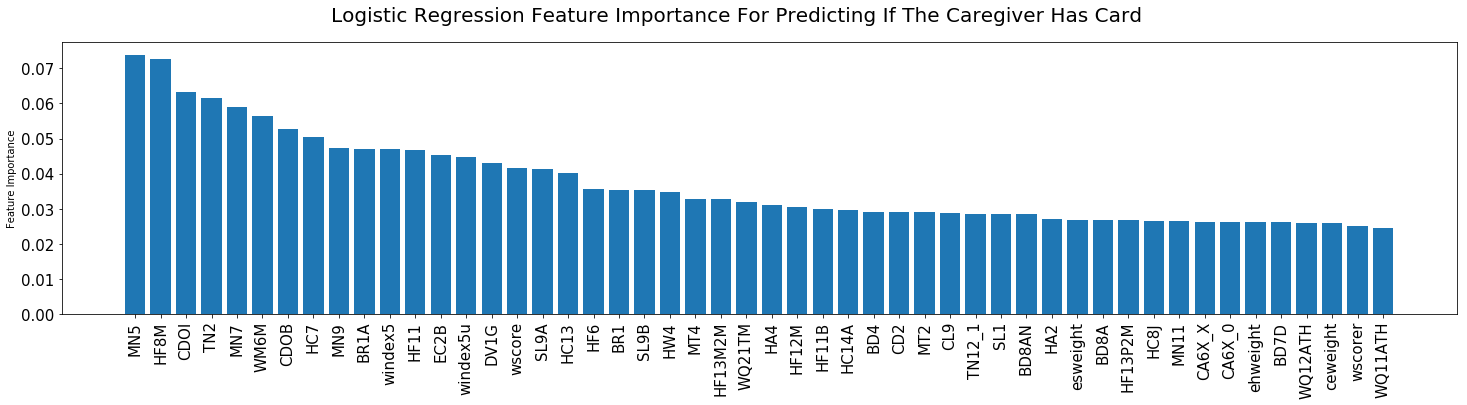

In [41]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [42]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [43]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.77      0.85      6448
          1       0.52      0.84      0.64      1879

avg / total       0.85      0.79      0.80      8327



# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [44]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.84


In [46]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.82      0.89      6448
          1       0.59      0.89      0.71      1879

avg / total       0.88      0.84      0.85      8327



Let's validate the results of Random Forests Model with kfold cross validation

In [47]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.837


In [48]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [49]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [50]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,HF11,0.030641
1,HF9D,0.030393
2,HF7,0.026628
3,HF9Y,0.025026
4,HF8M,0.022413
5,BD8J,0.021829
6,BD8I,0.021608
7,EC17,0.020945
8,EC16,0.020732
9,BD8N,0.020572


In [51]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_RF_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,HF11,0.030641,Result of health facility visit
1,HF9D,0.030393,Day of birth
2,HF7,0.026628,Interviewer number
3,HF9Y,0.025026,Year of birth
4,HF8M,0.022413,Month of interview
5,BD8J,0.021829,"Child ate meat, such as beef, lamb, goat, chicken"
6,BD8I,0.021608,"Child ate liver, kidney, brain or other organ ..."
7,EC17,0.020945,Child gets distracted easily
8,EC16,0.020732,"Child kicks, bites or hits other children or a..."
9,BD8N,0.020572,Child ate cheese or other food made from milk


In [52]:
people = people[0:50]
score = score[0:50]
x_pos = np.arange(len(people)) 

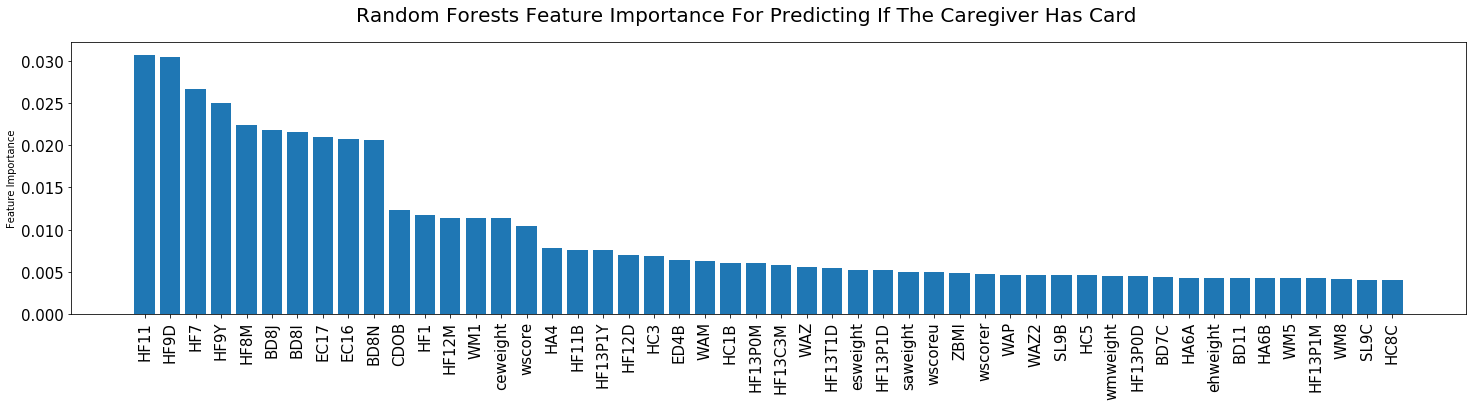

In [53]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

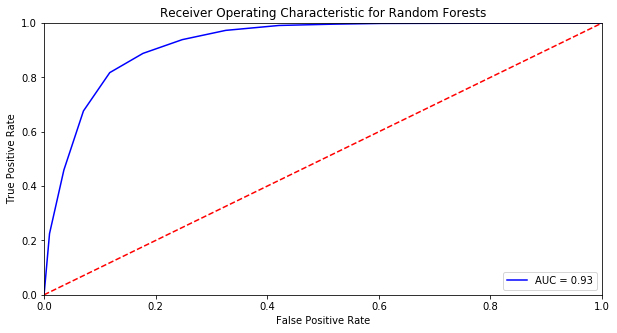

In [54]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [55]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train)

In [56]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.81


In [57]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.805


In [58]:
feature_imp_data = list(zip(X_train, gbd.feature_importances_))

In [59]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [60]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:100], columns=['name','Score'])
features_df

,name,Score
0,CDOB,0.062027
1,HF1,0.046772
2,HF9D,0.040856
3,HF12Y,0.032901
4,wscore,0.025463
5,HF11A,0.022722
6,HF7,0.020959
7,BD8F,0.017600
8,SL1,0.016541
9,MN5,0.016342


In [61]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_GB_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,CDOB,0.062027,Date of birth of child (CMC)
1,HF1,0.046772,Cluster number
2,HF9D,0.040856,Day of birth
3,HF12Y,0.032901,Year of birth as written on vaccination record
4,wscore,0.025463,Combined wealth score
5,HF11A,0.022722,Field editor
6,HF7,0.020959,Interviewer number
7,BD8F,0.017600,Child ate green leafy vegetables
8,SL1,0.016541,Total children aged 1-17 years
9,MN5,0.016342,NaN


In [62]:
people = people[0:30]
score = score[0:30]
x_pos = np.arange(len(people)) 

In [63]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.79      0.87      6448
          1       0.55      0.88      0.68      1879

avg / total       0.87      0.81      0.83      8327



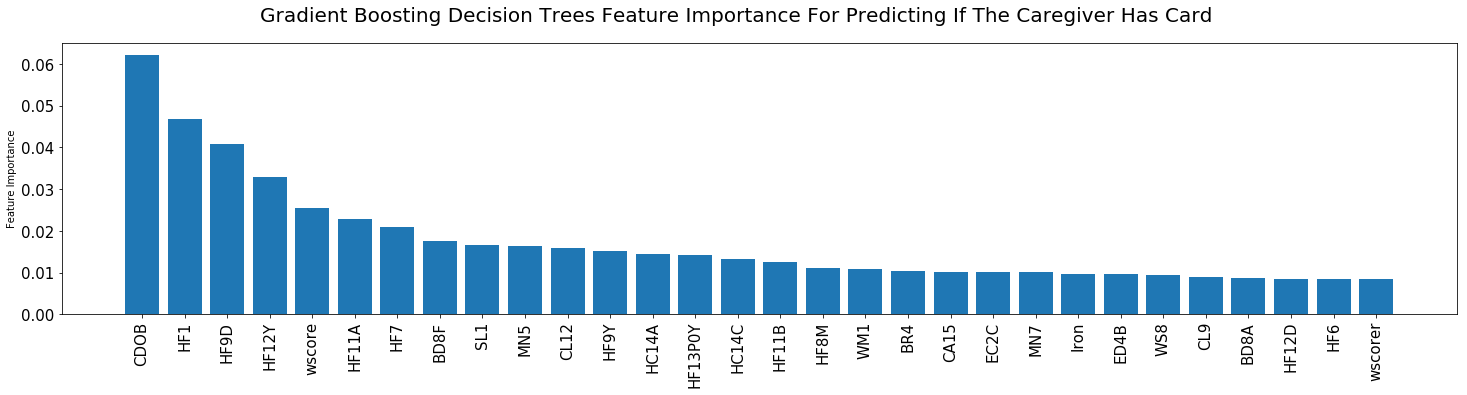

In [64]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

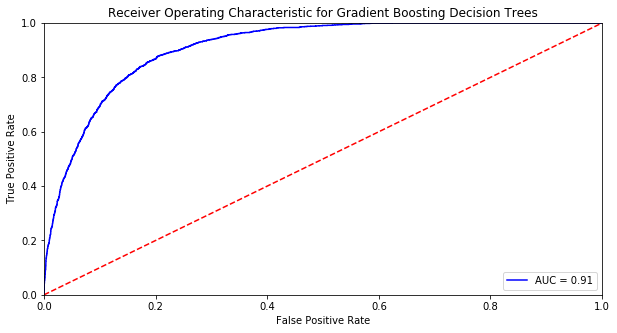

In [65]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gbd.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Gradient Boosting Decision Trees')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print(final_df.head())
nan_df = final_df[final_df.label.isnull()]
len(nan_df)

     name     Score                                           label
0    CDOB  0.062027                    Date of birth of child (CMC)
1     HF1  0.046772                                  Cluster number
2    HF9D  0.040856                                    Day of birth
3   HF12Y  0.032901  Year of birth as written on vaccination record
4  wscore  0.025463                           Combined wealth score


19

In [67]:
f_name_lst = list(nan_df.name)

In [68]:
final_df = final_df[~final_df['name'].isin(f_name_lst)]

In [69]:
final_df.sort_values('Score')

,name,Score,label
98,HF13T2M,0.002809,Month of Pentavalent 2nd Dose
97,HF4,0.002843,Child's line number
96,HC14E,0.002870,Chickens
93,BR3,0.003055,Know how to register birth
92,HF13C3D,0.003066,Day of Pneumococal 3
91,HC3,0.003076,Main material of floor
90,SI5,0.003079,Brand of salt provided for test
89,BD7F,0.003127,Child drank any other liquid yesterday
87,WAZ,0.003232,Weight for age z-score NCHS
85,HC2,0.003369,Number of rooms used for sleeping


In [70]:
selected_features = list(final_df.name)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [71]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
X_test = pd.get_dummies(X_test)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [73]:
feature_importance = (logreg.coef_[0])
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [74]:
col_list = list(X_train.columns[sorted_idx])
label_list = []
for i in col_list:
    label_row = final_df[final_df['name'] == i]
    label_list.append(list(label_row.label))

label_list = [''.join(x) for x in label_list]
print(label_list)

['Month of interview', 'Child ate ripe mangoes, papayas', 'Soap/other material available for washing hands', 'Times child ate solid or semi-solid food', 'Rural wealth score', 'Total children aged 1-17 years', 'Child ate pumpkin, carrots, squash etc.', 'Iron', 'Child ate liver, kidney, brain or other organ meat', 'Fluoride', 'Rank number of the selected child', 'Day of Pentavalent 3rd Dose', 'Birth certificate', 'Month of birth as written on vaccination record', 'Sheep', 'Month of Pentavalent 1st Dose', 'Cattle, milk cows, buffaloes or bulls', 'Salt results', 'Hours spent fetching water or collecting firewood', 'Person collecting water', 'Day of birth', 'Goats', 'Day of interview', 'Number of hours', 'Birth registered', 'Month of Measles 2', 'What was done to dispose of the stools', "Measurer's number", 'Date of birth of child (CMC)', 'Day of Polio2 immunization', 'Month of Pentavalent 2nd Dose', 'Child ate beans, lentils or nuts', 'Type of toilet facility', 'Weight for age percent of r

In [75]:
result_df = pd.DataFrame({'Feature': label_list ,'Coefficient': feature_importance[sorted_idx],'Column' :col_list})
result_df.head()

,Coefficient,Column,Feature
0,-0.327781,HF8M,Month of interview
1,-0.322941,BD8G,"Child ate ripe mangoes, papayas"
2,-0.243262,HW4,Soap/other material available for washing hands
3,-0.230443,BD11,Times child ate solid or semi-solid food
4,-0.151961,wscorer,Rural wealth score


In [76]:
result_df.to_csv('result_Pakistan.csv')

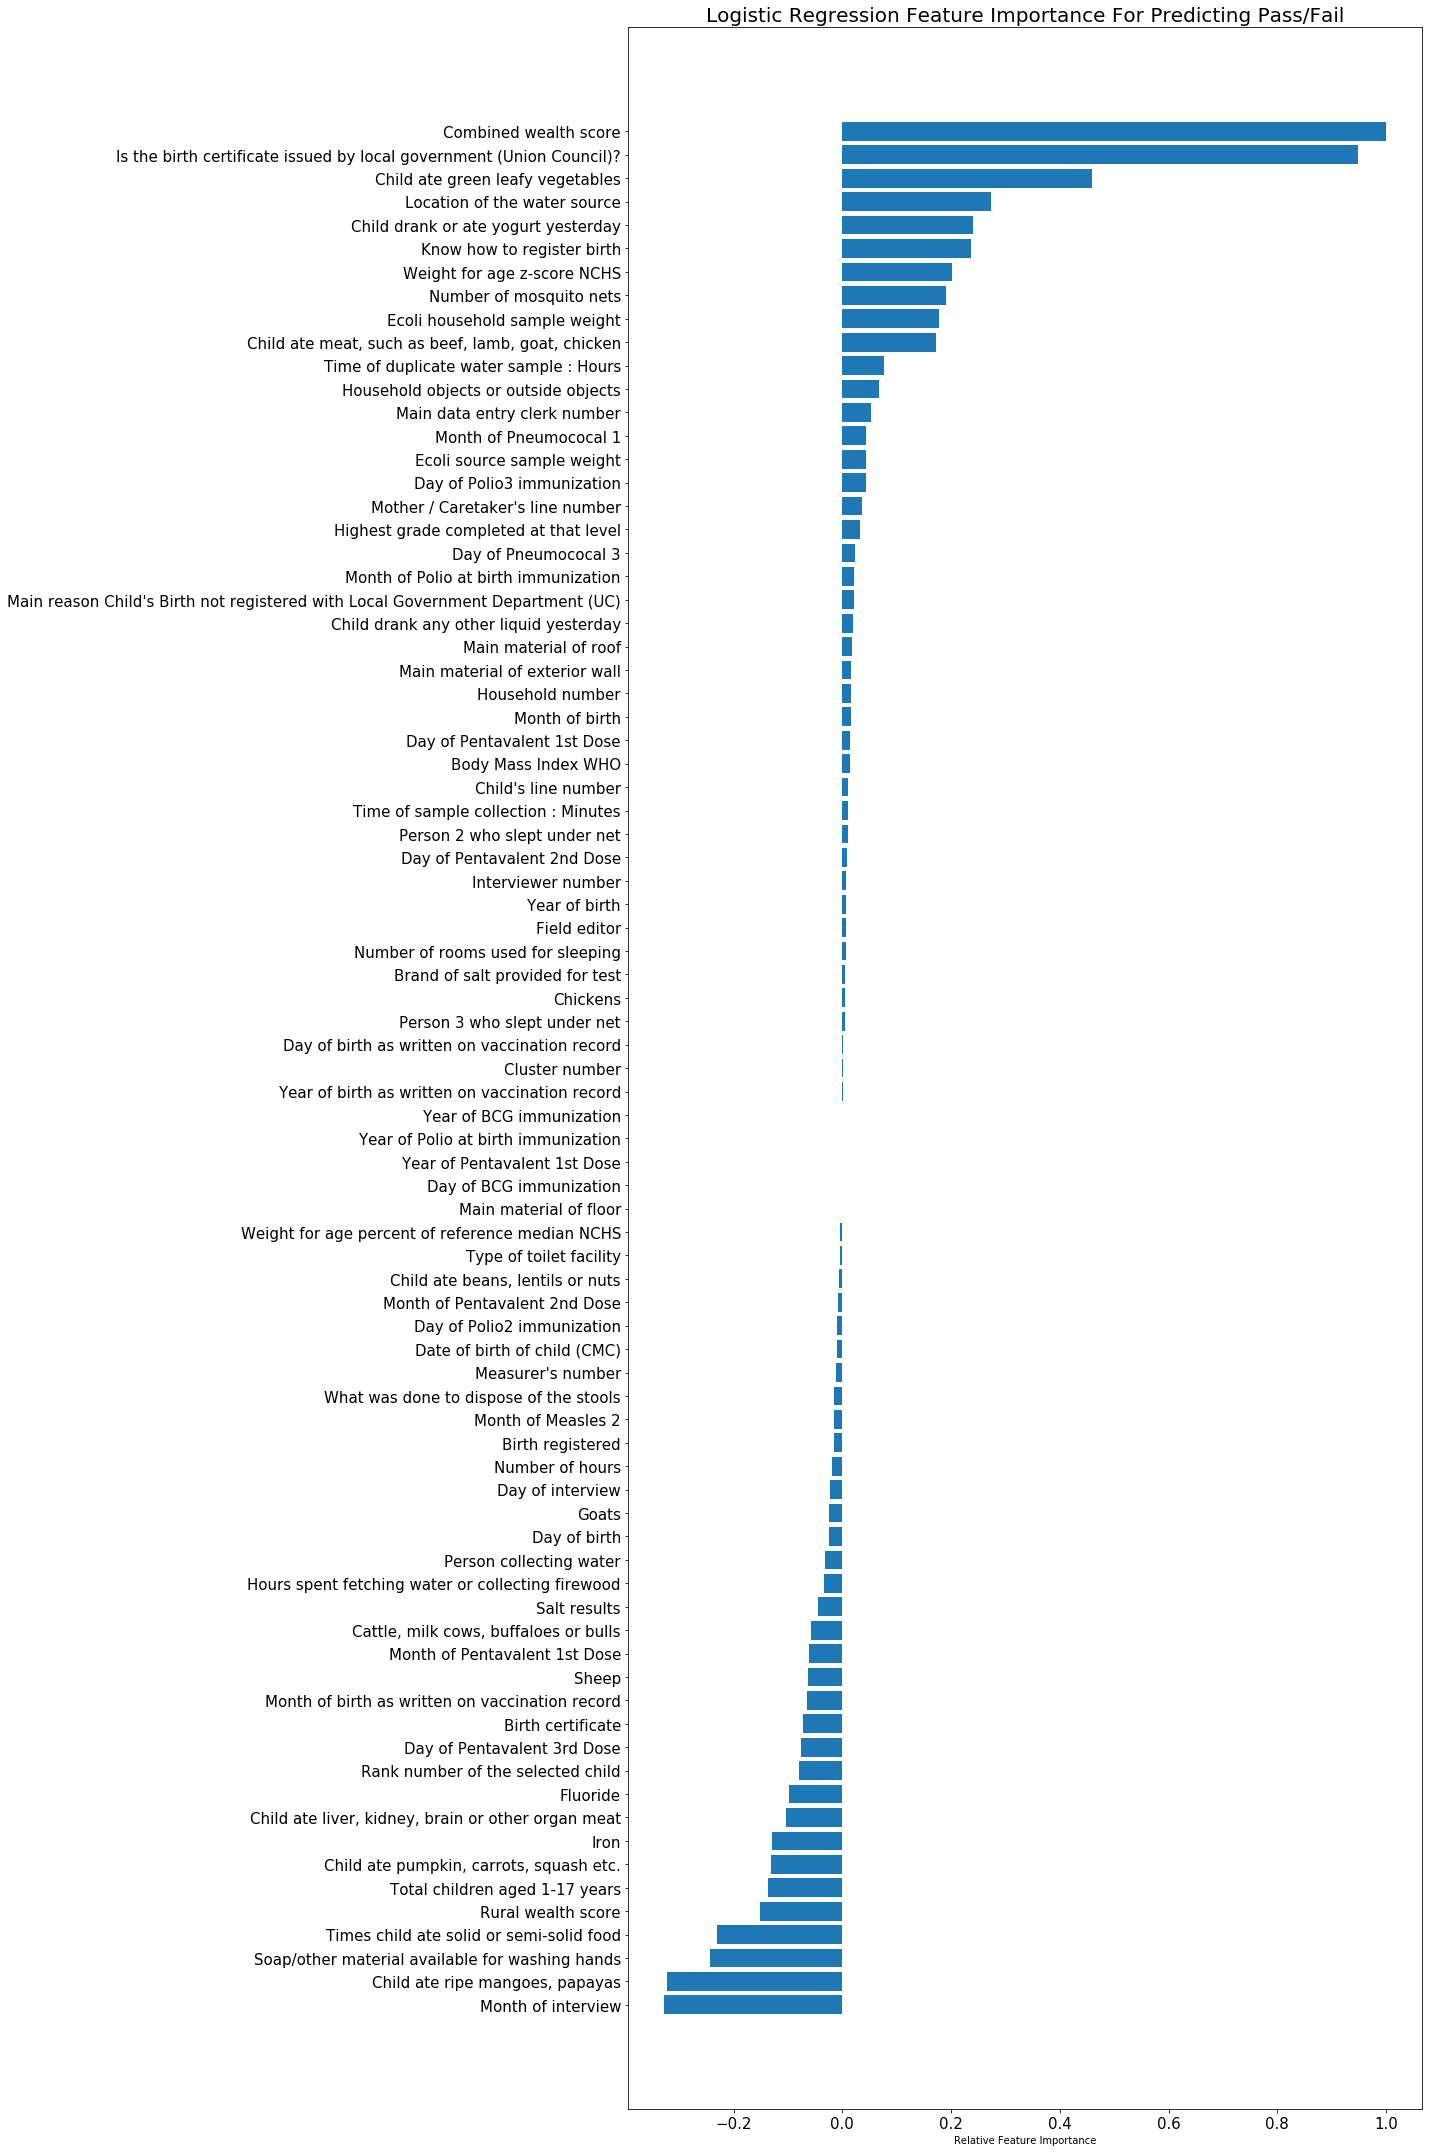

In [77]:
featfig = plt.figure(figsize=(20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(label_list, fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.title('Logistic Regression Feature Importance For Predicting Pass/Fail', fontsize=20)
plt.tight_layout()   
plt.show()